___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum().any()

False

In [7]:
df.duplicated().any()

False

In [8]:
df.drop("RowNumber", axis=1, inplace=True)

In [9]:
df.drop("Surname", axis=1, inplace=True)

In [10]:
df.drop("CustomerId", axis=1, inplace=True)

In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df.shape

(10000, 11)

------------------------------------------------------

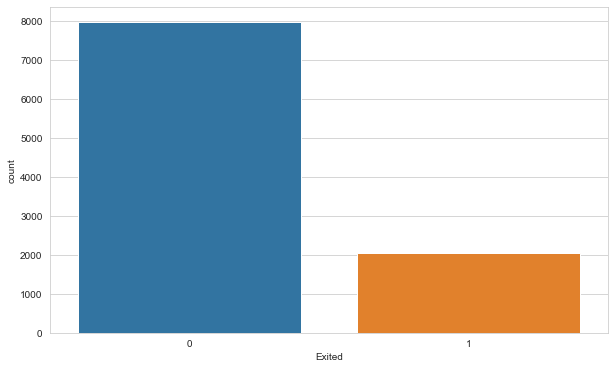

In [13]:
sns.countplot(df["Exited"]);

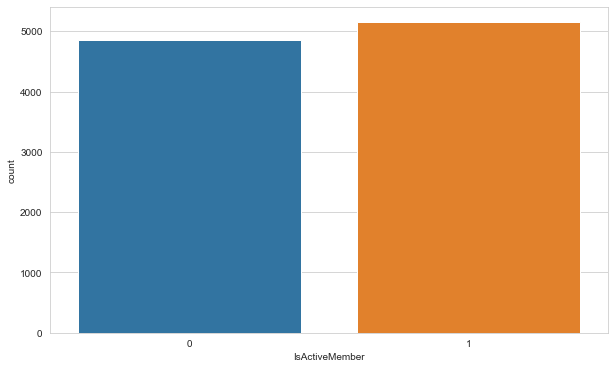

In [14]:
sns.countplot(df["IsActiveMember"]);

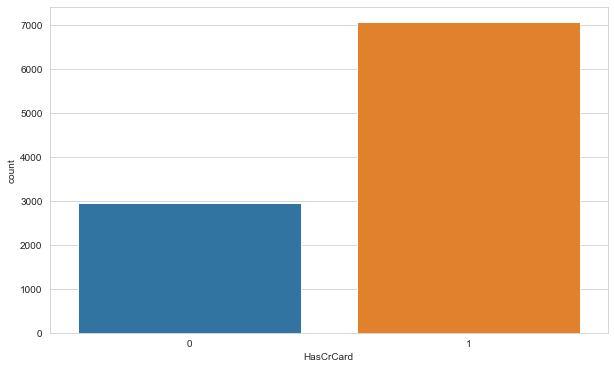

In [15]:
sns.countplot(df["HasCrCard"]);

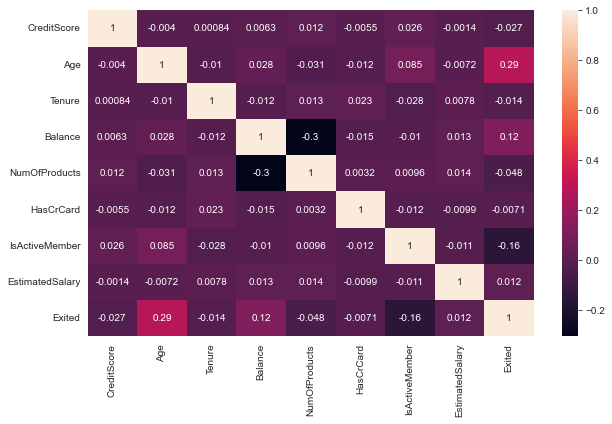

In [16]:
sns.heatmap(df.corr(), annot=True);

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


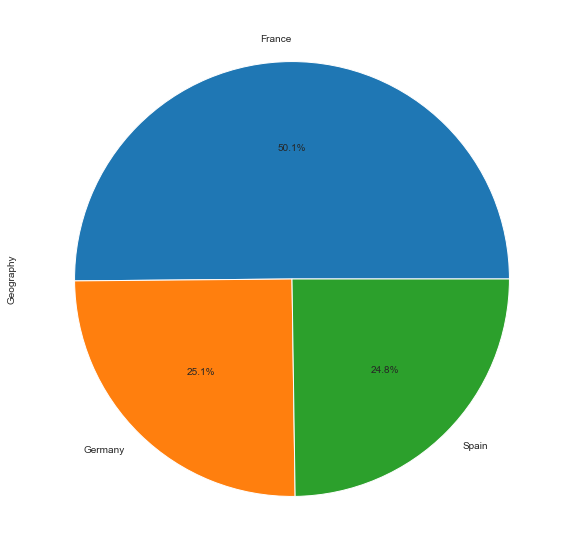

In [17]:
print(df["Geography"].value_counts())
df["Geography"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

Male      5457
Female    4543
Name: Gender, dtype: int64


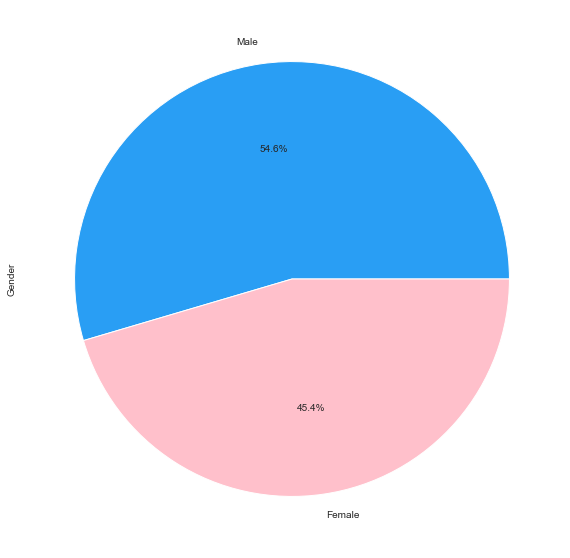

In [18]:
print(df["Gender"].value_counts())
df["Gender"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10), colors= ("#299EF4" , "pink"));

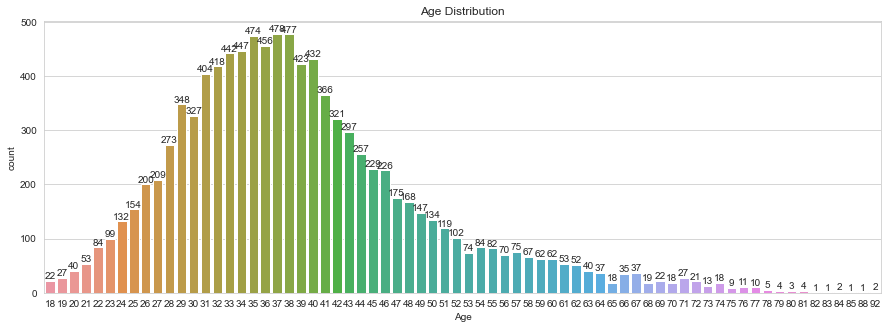

In [19]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x ='Age', data = df)
ax.bar_label(ax.containers[0])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show();

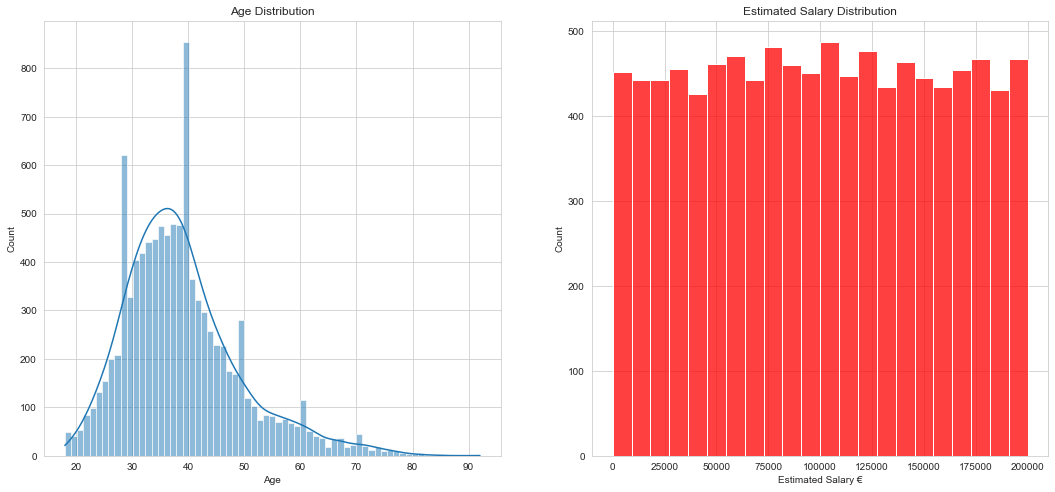

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count');

plt.subplot(1,2,2)
sns.histplot(x ='EstimatedSalary', data=df, color='red')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary €')
plt.ylabel('Count'); 

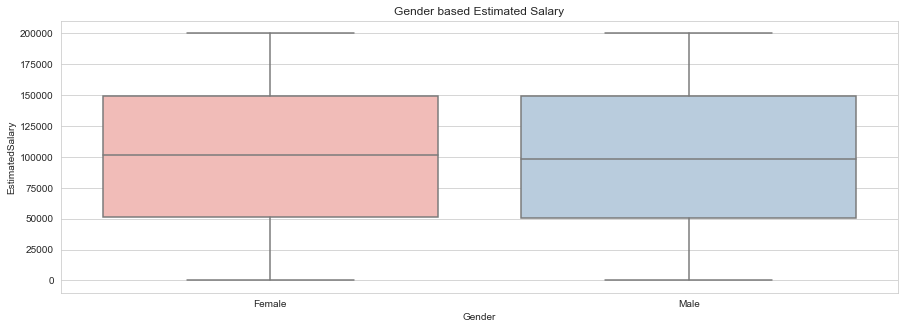

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='EstimatedSalary', data=df, palette= 'Pastel1')
plt.title('Gender based Estimated Salary')
plt.show()

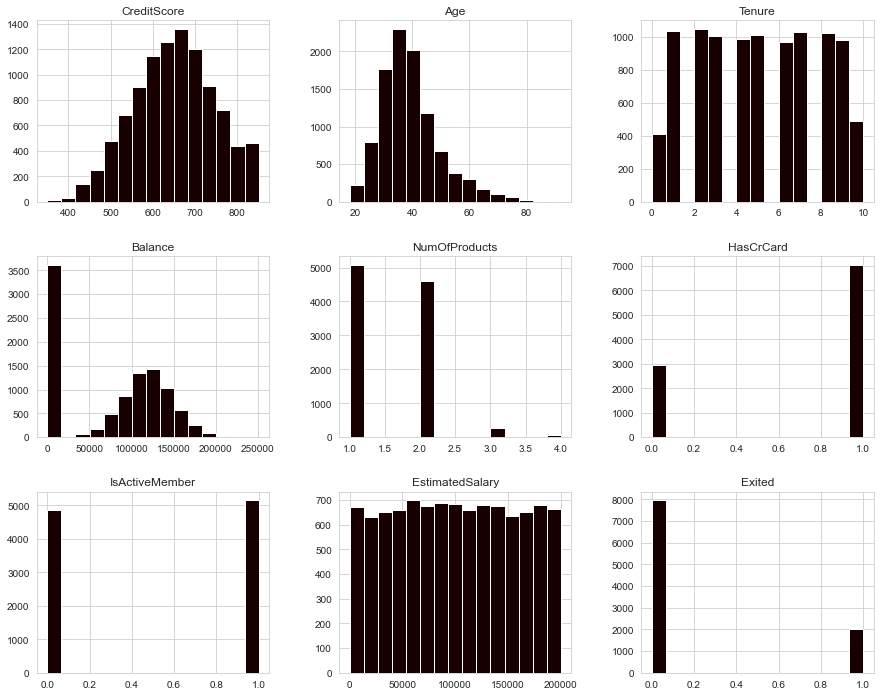

In [22]:
df.hist(figsize=(15, 12), bins=15, color="#180000");

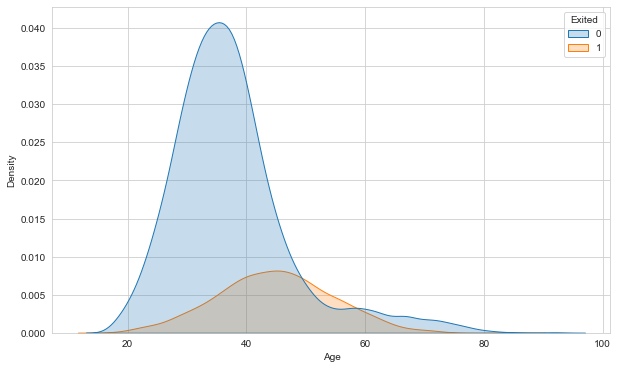

In [23]:
sns.kdeplot(df.Age, hue=df.Exited, fill=True);

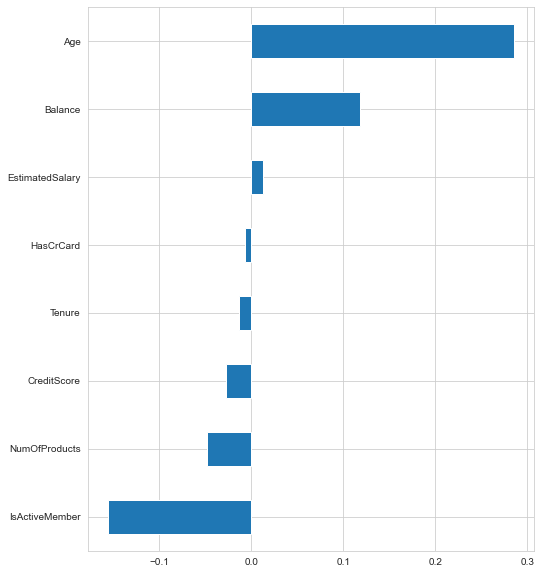

In [24]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

-------------------------------------

In [25]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [28]:
seed = 42

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [30]:
scaler = MinMaxScaler()

In [31]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import Adam

In [33]:
X_train.shape

(9000, 11)

In [34]:
X_test.shape

(1000, 11)

In [35]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [36]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 3ms/step - loss: 0.5426 - accuracy: 0.7960 - val_loss: 0.4871 - val_accuracy: 0.7989
Epoch 2/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.7960 - val_loss: 0.4618 - val_accuracy: 0.7989
Epoch 3/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.7962 - val_loss: 0.4407 - val_accuracy: 0.7989
Epoch 4/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8031 - val_loss: 0.4210 - val_accuracy: 0.8244
Epoch 5/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.8104 - val_loss: 0.4079 - val_accuracy: 0.8344
Epoch 6/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8179 - val_loss: 0.4015 - val_accuracy: 0.8344
Epoch 7/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8190 - val_loss: 0.3898 - val_accuracy: 0.8422
Epoch 8/300
6

Epoch 59/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8659 - val_loss: 0.3003 - val_accuracy: 0.8856
Epoch 60/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8642 - val_loss: 0.2985 - val_accuracy: 0.8844
Epoch 61/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8642 - val_loss: 0.2995 - val_accuracy: 0.8844
Epoch 62/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.8656 - val_loss: 0.3036 - val_accuracy: 0.8822
Epoch 63/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.8653 - val_loss: 0.3002 - val_accuracy: 0.8889
Epoch 64/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8651 - val_loss: 0.2990 - val_accuracy: 0.8833
Epoch 65/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.8649 - val_loss: 0.3008 - val_accuracy: 0.8833
Epoch 

64/64 [==============================] - 0s 1ms/step - loss: 0.3168 - accuracy: 0.8700 - val_loss: 0.3032 - val_accuracy: 0.8822
Epoch 117/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8710 - val_loss: 0.3053 - val_accuracy: 0.8767
Epoch 118/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8694 - val_loss: 0.3032 - val_accuracy: 0.8756
Epoch 119/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.8701 - val_loss: 0.3037 - val_accuracy: 0.8789
Epoch 120/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8685 - val_loss: 0.3040 - val_accuracy: 0.8789
Epoch 121/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8689 - val_loss: 0.3075 - val_accuracy: 0.8822
Epoch 122/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8689 - val_loss: 0.3057 - val_accuracy: 0.8744
Epoch 123/300

64/64 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8756 - val_loss: 0.3119 - val_accuracy: 0.8789
Epoch 174/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.8738 - val_loss: 0.3074 - val_accuracy: 0.8767
Epoch 175/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3098 - accuracy: 0.8714 - val_loss: 0.3055 - val_accuracy: 0.8800
Epoch 176/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.8722 - val_loss: 0.3059 - val_accuracy: 0.8800
Epoch 177/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8715 - val_loss: 0.3081 - val_accuracy: 0.8756
Epoch 178/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8738 - val_loss: 0.3068 - val_accuracy: 0.8800
Epoch 179/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.8723 - val_loss: 0.3054 - val_accuracy: 0.8800
Epoch 180/300

64/64 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.8722 - val_loss: 0.3078 - val_accuracy: 0.8822
Epoch 231/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8733 - val_loss: 0.3098 - val_accuracy: 0.8778
Epoch 232/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8730 - val_loss: 0.3108 - val_accuracy: 0.8800
Epoch 233/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8756 - val_loss: 0.3075 - val_accuracy: 0.8733
Epoch 234/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8748 - val_loss: 0.3128 - val_accuracy: 0.8778
Epoch 235/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.8749 - val_loss: 0.3095 - val_accuracy: 0.8789
Epoch 236/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8743 - val_loss: 0.3158 - val_accuracy: 0.8744
Epoch 237/300

64/64 [==============================] - 0s 1ms/step - loss: 0.3028 - accuracy: 0.8741 - val_loss: 0.3115 - val_accuracy: 0.8756
Epoch 288/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8738 - val_loss: 0.3135 - val_accuracy: 0.8756
Epoch 289/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8764 - val_loss: 0.3170 - val_accuracy: 0.8767
Epoch 290/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3037 - accuracy: 0.8768 - val_loss: 0.3201 - val_accuracy: 0.8678
Epoch 291/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.8732 - val_loss: 0.3161 - val_accuracy: 0.8744
Epoch 292/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3028 - accuracy: 0.8764 - val_loss: 0.3124 - val_accuracy: 0.8767
Epoch 293/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3029 - accuracy: 0.8737 - val_loss: 0.3085 - val_accuracy: 0.8789
Epoch 294/300

In [37]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 32) dtype=float32, numpy=
 array([[ 2.53507830e-02,  1.03430539e-01,  1.56754315e-01,
          2.53241032e-01,  1.48655549e-01,  4.56427075e-02,
         -6.39830351e-01,  1.95360910e-02, -1.57510668e-01,
          2.56522209e-04, -8.40019658e-02,  2.59483069e-01,
         -1.29759803e-01, -7.46924877e-02,  2.56457806e-01,
          3.57649662e-02,  4.27333176e-01, -3.90277058e-02,
          3.72711688e-01,  1.16796106e-01,  2.61448056e-01,
         -2.23116726e-01, -1.78631842e-01,  2.64879227e-01,
         -2.24867955e-01,  7.57107064e-02,  5.28276861e-01,
          4.45832938e-01,  9.85265896e-02,  1.98756441e-01,
          1.38120234e-01, -9.93531793e-02],
        [ 9.79655683e-01,  2.23725084e-02, -4.94765937e-02,
          1.81218490e-01,  2.41656005e-01, -2.37770751e-01,
         -7.51982927e-02,  2.65987545e-01, -3.69099192e-02,
          3.60961080e-01,  2.55176783e-01,  4.58760828e-01,
         -2.36746952e-01,  1.19854629e+00, -4.17

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.543,0.796,0.487,0.799
1,0.484,0.796,0.462,0.799
2,0.467,0.796,0.441,0.799
3,0.452,0.803,0.421,0.824
4,0.440,0.810,0.408,0.834


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

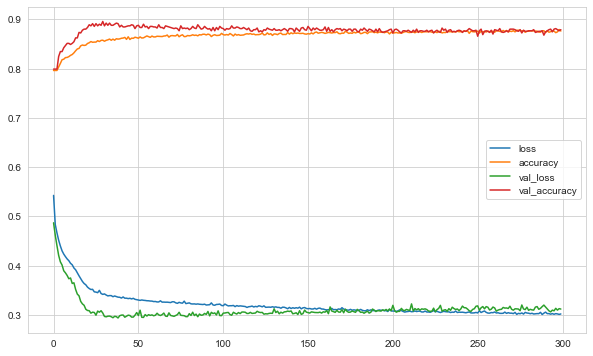

In [40]:
loss_df.plot();

In [41]:
model.evaluate(X_test, y_test, verbose=0)

[0.345355749130249, 0.8539999723434448]

In [42]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.345355749130249
accuracy :  0.8539999723434448


In [43]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 698us/step
[[754  42]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.70      0.49      0.58       204

    accuracy                           0.85      1000
   macro avg       0.79      0.72      0.74      1000
weighted avg       0.84      0.85      0.84      1000



32/32 [==============================] - 0s 720us/step


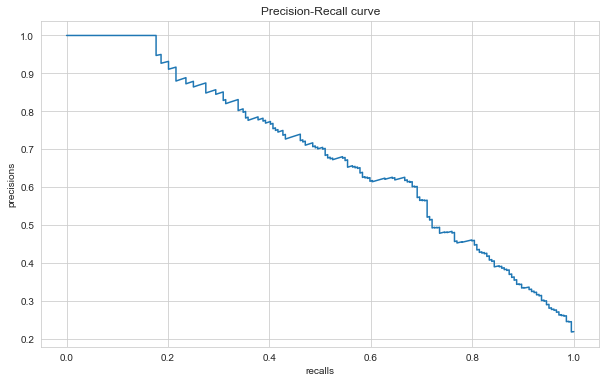

In [44]:
y_pred_proba = model.predict(X_test)  
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [45]:
average_precision_score(y_test, y_pred_proba)

0.6855740927160355

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [46]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [47]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [48]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.7014 - val_loss: 0.6283 - val_accuracy: 0.6978
Epoch 2/300
64/64 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.6285 - val_loss: 0.6214 - val_accuracy: 0.6411
Epoch 3/300
64/64 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.6338 - val_loss: 0.5994 - val_accuracy: 0.6722
Epoch 4/300
64/64 [==============================] - 0s 1ms/step - loss: 0.6168 - accuracy: 0.6516 - val_loss: 0.5680 - val_accuracy: 0.7167
Epoch 5/300
64/64 [==============================] - 0s 1ms/step - loss: 0.6018 - accuracy: 0.6709 - val_loss: 0.5741 - val_accuracy: 0.7033
Epoch 6/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.6894 - val_loss: 0.5074 - val_accuracy: 0.7622
Epoch 7/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.6969 - val_loss: 0.5564 - val_accuracy: 0.7200
Epoch 8/300
6

Epoch 59/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7806 - val_loss: 0.4393 - val_accuracy: 0.7867
Epoch 60/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.7815 - val_loss: 0.4300 - val_accuracy: 0.7900
Epoch 61/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.7827 - val_loss: 0.4482 - val_accuracy: 0.7678
Epoch 62/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.7840 - val_loss: 0.4705 - val_accuracy: 0.7522
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7832 - val_loss: 0.4424 - val_accuracy: 0.7811
Epoch 64/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.7826 - val_loss: 0.4753 - val_accuracy: 0.7467
Epoch 65/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.7810 - val_loss: 0.4010 - val_accuracy: 0.8244
Epoch 

64/64 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.7940 - val_loss: 0.4454 - val_accuracy: 0.7733
Epoch 117/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7864 - val_loss: 0.4572 - val_accuracy: 0.7589
Epoch 118/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.7885 - val_loss: 0.4016 - val_accuracy: 0.8122
Epoch 119/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7881 - val_loss: 0.4168 - val_accuracy: 0.7967
Epoch 120/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.7890 - val_loss: 0.4108 - val_accuracy: 0.8056
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.7879 - val_loss: 0.4434 - val_accuracy: 0.7711
Epoch 122/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7804 - val_loss: 0.3710 - val_accuracy: 0.8478
Epoch 123/300

64/64 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7941 - val_loss: 0.4154 - val_accuracy: 0.7967
Epoch 174/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.7902 - val_loss: 0.3687 - val_accuracy: 0.8500
Epoch 175/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.7899 - val_loss: 0.4037 - val_accuracy: 0.8156
Epoch 176/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.7941 - val_loss: 0.3830 - val_accuracy: 0.8378
Epoch 177/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.7917 - val_loss: 0.4514 - val_accuracy: 0.7600
Epoch 178/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.7926 - val_loss: 0.4662 - val_accuracy: 0.7511
Epoch 179/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7898 - val_loss: 0.3854 - val_accuracy: 0.8322
Epoch 180/300

64/64 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7912 - val_loss: 0.3881 - val_accuracy: 0.8211
Epoch 231/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.7953 - val_loss: 0.4335 - val_accuracy: 0.7689
Epoch 232/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.7936 - val_loss: 0.4169 - val_accuracy: 0.7889
Epoch 233/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.7970 - val_loss: 0.4247 - val_accuracy: 0.7922
Epoch 234/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.7948 - val_loss: 0.4570 - val_accuracy: 0.7578
Epoch 235/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.7959 - val_loss: 0.4121 - val_accuracy: 0.8078
Epoch 236/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7943 - val_loss: 0.4287 - val_accuracy: 0.7878
Epoch 237/300

64/64 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.7952 - val_loss: 0.3656 - val_accuracy: 0.8478
Epoch 288/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.7965 - val_loss: 0.4236 - val_accuracy: 0.7967
Epoch 289/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8019 - val_loss: 0.4734 - val_accuracy: 0.7522
Epoch 290/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.7956 - val_loss: 0.4249 - val_accuracy: 0.8056
Epoch 291/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.7951 - val_loss: 0.4386 - val_accuracy: 0.7933
Epoch 292/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.7979 - val_loss: 0.3968 - val_accuracy: 0.8200
Epoch 293/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.7983 - val_loss: 0.4173 - val_accuracy: 0.8011
Epoch 294/300

32/32 [==============================] - 0s 726us/step


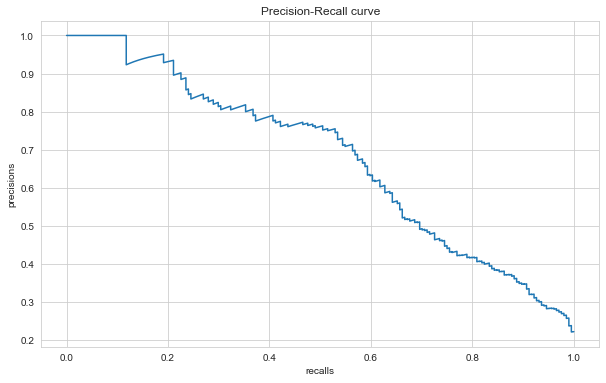

In [49]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [50]:
average_precision_score(y_test, y_pred_proba)

0.6783792059948028

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [51]:
model.evaluate(X_test, y_test, verbose=0)

[0.46298134326934814, 0.7639999985694885]

In [52]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.46298134326934814
accuracy :  0.7639999985694885


In [53]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 649us/step
[[612 184]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       796
           1       0.45      0.75      0.56       204

    accuracy                           0.76      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [54]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [55]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 3ms/step - loss: 0.6606 - accuracy: 0.6841 - val_loss: 0.5714 - val_accuracy: 0.7078
Epoch 2/300
64/64 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.6578 - val_loss: 0.6300 - val_accuracy: 0.6511
Epoch 3/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7053 - val_loss: 0.5555 - val_accuracy: 0.7278
Epoch 4/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.7359 - val_loss: 0.5473 - val_accuracy: 0.7233
Epoch 5/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.7478 - val_loss: 0.4383 - val_accuracy: 0.8233
Epoch 6/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7633 - val_loss: 0.4184 - val_accuracy: 0.8222
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7646 - val_loss: 0.4061 - val_accuracy: 0.8256
Epoch 8/300
6

Epoch 59/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.8004 - val_loss: 0.3942 - val_accuracy: 0.8156
Epoch 60/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7969 - val_loss: 0.4437 - val_accuracy: 0.7811
Epoch 61/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.7969 - val_loss: 0.4313 - val_accuracy: 0.7822
Epoch 62/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8023 - val_loss: 0.4456 - val_accuracy: 0.7711
Epoch 63/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.7986 - val_loss: 0.3952 - val_accuracy: 0.8144
Epoch 64/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8011 - val_loss: 0.4016 - val_accuracy: 0.8044
Epoch 65/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8033 - val_loss: 0.3885 - val_accuracy: 0.8100
Epoch 

64/64 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8195 - val_loss: 0.4602 - val_accuracy: 0.7789
Epoch 117/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8101 - val_loss: 0.4025 - val_accuracy: 0.8078
Epoch 118/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8138 - val_loss: 0.3821 - val_accuracy: 0.8311
Epoch 119/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8137 - val_loss: 0.3930 - val_accuracy: 0.8167
Epoch 120/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8184 - val_loss: 0.4178 - val_accuracy: 0.8022
Epoch 121/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8185 - val_loss: 0.4699 - val_accuracy: 0.7533
Epoch 122/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8035 - val_loss: 0.3689 - val_accuracy: 0.8322
Epoch 123/300

64/64 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8249 - val_loss: 0.4635 - val_accuracy: 0.7878
Epoch 174/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8186 - val_loss: 0.3977 - val_accuracy: 0.8200
Epoch 175/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8236 - val_loss: 0.4270 - val_accuracy: 0.7989
Epoch 176/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3735 - accuracy: 0.8238 - val_loss: 0.4526 - val_accuracy: 0.7889
Epoch 177/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8202 - val_loss: 0.4614 - val_accuracy: 0.7778
Epoch 178/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8238 - val_loss: 0.4026 - val_accuracy: 0.8200
Epoch 179/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8235 - val_loss: 0.4284 - val_accuracy: 0.8056
Epoch 180/300

64/64 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8262 - val_loss: 0.4158 - val_accuracy: 0.8100
Epoch 231/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8290 - val_loss: 0.4534 - val_accuracy: 0.8000
Epoch 232/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.8249 - val_loss: 0.4333 - val_accuracy: 0.8033
Epoch 233/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8330 - val_loss: 0.4268 - val_accuracy: 0.8033
Epoch 234/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3674 - accuracy: 0.8280 - val_loss: 0.4542 - val_accuracy: 0.7878
Epoch 235/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8253 - val_loss: 0.4508 - val_accuracy: 0.7922
Epoch 236/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8326 - val_loss: 0.4396 - val_accuracy: 0.7989
Epoch 237/300

64/64 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8359 - val_loss: 0.4479 - val_accuracy: 0.8011
Epoch 288/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8319 - val_loss: 0.4680 - val_accuracy: 0.7833
Epoch 289/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8362 - val_loss: 0.4669 - val_accuracy: 0.7878
Epoch 290/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8365 - val_loss: 0.5134 - val_accuracy: 0.7667
Epoch 291/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8348 - val_loss: 0.4453 - val_accuracy: 0.7978
Epoch 292/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8337 - val_loss: 0.4697 - val_accuracy: 0.7944
Epoch 293/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8343 - val_loss: 0.4562 - val_accuracy: 0.7967
Epoch 294/300

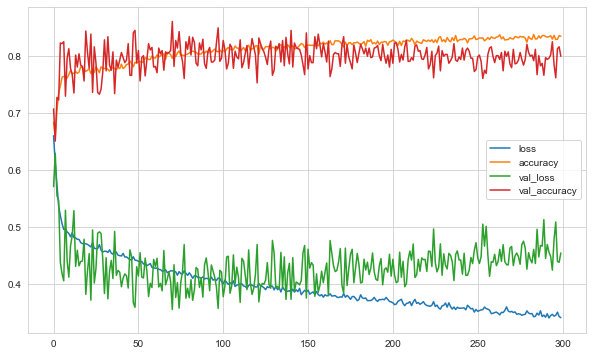

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(); #overfitting

In [57]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 678us/step
[[629 167]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.73      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



### Add Dropout Layer

In [58]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [59]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose = 1)

Epoch 1/300
64/64 [==============================] - 1s 3ms/step - loss: 0.6267 - accuracy: 0.7107 - val_loss: 0.5468 - val_accuracy: 0.7989
Epoch 2/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.7810 - val_loss: 0.5058 - val_accuracy: 0.7989
Epoch 3/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.7905 - val_loss: 0.4843 - val_accuracy: 0.7989
Epoch 4/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5289 - accuracy: 0.7954 - val_loss: 0.4722 - val_accuracy: 0.7989
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7951 - val_loss: 0.4782 - val_accuracy: 0.7989
Epoch 6/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.7958 - val_loss: 0.4667 - val_accuracy: 0.7989
Epoch 7/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.7959 - val_loss: 0.4739 - val_accuracy: 0.7989
Epoch 8/300
6

Epoch 59/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8167 - val_loss: 0.3553 - val_accuracy: 0.8411
Epoch 60/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8181 - val_loss: 0.3551 - val_accuracy: 0.8533
Epoch 61/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8162 - val_loss: 0.3486 - val_accuracy: 0.8444
Epoch 62/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8175 - val_loss: 0.3562 - val_accuracy: 0.8578
Epoch 63/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.8183 - val_loss: 0.3476 - val_accuracy: 0.8533
Epoch 64/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8174 - val_loss: 0.3459 - val_accuracy: 0.8622
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8196 - val_loss: 0.3467 - val_accuracy: 0.8589
Epoch 

64/64 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8298 - val_loss: 0.3230 - val_accuracy: 0.8822
Epoch 117/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8243 - val_loss: 0.3225 - val_accuracy: 0.8789
Epoch 118/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8258 - val_loss: 0.3215 - val_accuracy: 0.8789
Epoch 119/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8309 - val_loss: 0.3206 - val_accuracy: 0.8811
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8270 - val_loss: 0.3208 - val_accuracy: 0.8767
Epoch 121/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8290 - val_loss: 0.3159 - val_accuracy: 0.8800
Epoch 122/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8272 - val_loss: 0.3203 - val_accuracy: 0.8789
Epoch 123/300

64/64 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8300 - val_loss: 0.3179 - val_accuracy: 0.8800
Epoch 174/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8300 - val_loss: 0.3141 - val_accuracy: 0.8778
Epoch 175/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8291 - val_loss: 0.3159 - val_accuracy: 0.8767
Epoch 176/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8317 - val_loss: 0.3207 - val_accuracy: 0.8744
Epoch 177/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8274 - val_loss: 0.3205 - val_accuracy: 0.8756
Epoch 178/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8288 - val_loss: 0.3155 - val_accuracy: 0.8778
Epoch 179/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8312 - val_loss: 0.3139 - val_accuracy: 0.8822
Epoch 180/300

64/64 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8315 - val_loss: 0.3097 - val_accuracy: 0.8822
Epoch 231/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8311 - val_loss: 0.3120 - val_accuracy: 0.8789
Epoch 232/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8307 - val_loss: 0.3114 - val_accuracy: 0.8789
Epoch 233/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8325 - val_loss: 0.3097 - val_accuracy: 0.8778
Epoch 234/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8269 - val_loss: 0.3199 - val_accuracy: 0.8811
Epoch 235/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8300 - val_loss: 0.3137 - val_accuracy: 0.8778
Epoch 236/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8343 - val_loss: 0.3121 - val_accuracy: 0.8789
Epoch 237/300

64/64 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8356 - val_loss: 0.3131 - val_accuracy: 0.8800
Epoch 288/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8317 - val_loss: 0.3131 - val_accuracy: 0.8789
Epoch 289/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3918 - accuracy: 0.8336 - val_loss: 0.3100 - val_accuracy: 0.8822
Epoch 290/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8347 - val_loss: 0.3144 - val_accuracy: 0.8800
Epoch 291/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3874 - accuracy: 0.8379 - val_loss: 0.3096 - val_accuracy: 0.8822
Epoch 292/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8321 - val_loss: 0.3141 - val_accuracy: 0.8800
Epoch 293/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8284 - val_loss: 0.3133 - val_accuracy: 0.8800
Epoch 294/300

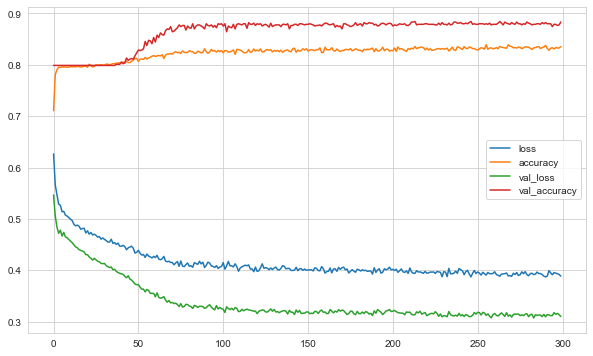

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34731510281562805
accuracy :  0.8569999933242798


In [62]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 689us/step
[[783  13]
 [130  74]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       796
           1       0.85      0.36      0.51       204

    accuracy                           0.86      1000
   macro avg       0.85      0.67      0.71      1000
weighted avg       0.86      0.86      0.83      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [63]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [64]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [65]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 3ms/step - loss: 0.6576 - accuracy: 0.6247 - val_loss: 0.6072 - val_accuracy: 0.6700
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6611 - val_loss: 0.6530 - val_accuracy: 0.6144
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.6953 - val_loss: 0.5542 - val_accuracy: 0.7256
Epoch 4/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.7268 - val_loss: 0.5187 - val_accuracy: 0.7367
Epoch 5/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.7438 - val_loss: 0.4227 - val_accuracy: 0.8289
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7559 - val_loss: 0.4211 - val_accuracy: 0.8156
Epoch 7/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7590 - val_loss: 0.4310 - val_accuracy: 0.7956
Epoch 8/300
6

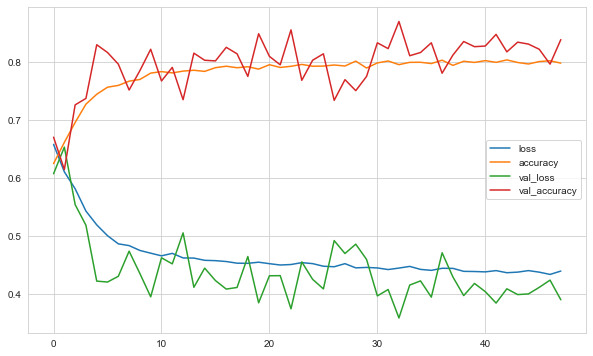

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 792us/step
[[673 123]
 [ 60 144]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       796
           1       0.54      0.71      0.61       204

    accuracy                           0.82      1000
   macro avg       0.73      0.78      0.75      1000
weighted avg       0.84      0.82      0.83      1000



#### Monitor the "val_recall" as metric

In [68]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [69]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [70]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 3ms/step - loss: 0.6591 - accuracy: 0.6595 - val_loss: 0.5834 - val_accuracy: 0.7189
Epoch 2/300
64/64 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.6747 - val_loss: 0.6332 - val_accuracy: 0.6578
Epoch 3/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.6998 - val_loss: 0.5461 - val_accuracy: 0.7289
Epoch 4/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.7228 - val_loss: 0.5403 - val_accuracy: 0.7156
Epoch 5/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7357 - val_loss: 0.4312 - val_accuracy: 0.7956
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7480 - val_loss: 0.4011 - val_accuracy: 0.8133
Epoch 7/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.7553 - val_loss: 0.4155 - val_accuracy: 0.8011
Epoch 8/300
6

Epoch 23/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7872 - val_loss: 0.3757 - val_accuracy: 0.8544
Epoch 24/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7878 - val_loss: 0.4735 - val_accuracy: 0.7567
Epoch 25/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7901 - val_loss: 0.3915 - val_accuracy: 0.8389
Epoch 26/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7948 - val_loss: 0.4215 - val_accuracy: 0.8144
Epoch 27/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7904 - val_loss: 0.4664 - val_accuracy: 0.7678
Epoch 28/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.7881 - val_loss: 0.4510 - val_accuracy: 0.7644
Epoch 29/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.7954 - val_loss: 0.4800 - val_accuracy: 0.7567
Epoch 

Epoch 45/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7977 - val_loss: 0.3973 - val_accuracy: 0.8100
Epoch 46/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8025 - val_loss: 0.4408 - val_accuracy: 0.7778
Epoch 47/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.7988 - val_loss: 0.4353 - val_accuracy: 0.7922
Epoch 48/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7998 - val_loss: 0.3648 - val_accuracy: 0.8478
Epoch 49/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8010 - val_loss: 0.3738 - val_accuracy: 0.8389
Epoch 50/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7995 - val_loss: 0.4146 - val_accuracy: 0.7967
Epoch 51/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8028 - val_loss: 0.4066 - val_accuracy: 0.8078
Epoch 

Epoch 67/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8038 - val_loss: 0.3915 - val_accuracy: 0.8044
Epoch 68/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8056 - val_loss: 0.4380 - val_accuracy: 0.7867
Epoch 69/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8058 - val_loss: 0.4778 - val_accuracy: 0.7556
Epoch 70/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8030 - val_loss: 0.4170 - val_accuracy: 0.8022
Epoch 71/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.8065 - val_loss: 0.3632 - val_accuracy: 0.8511
Epoch 72/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8090 - val_loss: 0.4068 - val_accuracy: 0.8056
Epoch 73/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8043 - val_loss: 0.3949 - val_accuracy: 0.8144
Epoch 

Epoch 89/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8047 - val_loss: 0.4054 - val_accuracy: 0.8033
Epoch 90/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8069 - val_loss: 0.4318 - val_accuracy: 0.7822
Epoch 91/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8094 - val_loss: 0.4705 - val_accuracy: 0.7678
Epoch 92/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8047 - val_loss: 0.4539 - val_accuracy: 0.7756
Epoch 93/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8063 - val_loss: 0.4079 - val_accuracy: 0.8067
Epoch 94/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8081 - val_loss: 0.4419 - val_accuracy: 0.7800
Epoch 95/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8073 - val_loss: 0.4118 - val_accuracy: 0.8033
Epoch 

Epoch 111/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8064 - val_loss: 0.3749 - val_accuracy: 0.8200
Epoch 112/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8130 - val_loss: 0.4497 - val_accuracy: 0.7656
Epoch 113/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8123 - val_loss: 0.4460 - val_accuracy: 0.7778
Epoch 114/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8114 - val_loss: 0.4368 - val_accuracy: 0.7800
Epoch 115/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8149 - val_loss: 0.4108 - val_accuracy: 0.8100
Epoch 116/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8136 - val_loss: 0.4609 - val_accuracy: 0.7700
Epoch 117/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8075 - val_loss: 0.4182 - val_accuracy: 0.7967

Epoch 133/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8100 - val_loss: 0.4046 - val_accuracy: 0.8044
Epoch 134/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8130 - val_loss: 0.4010 - val_accuracy: 0.8111
Epoch 135/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8172 - val_loss: 0.4817 - val_accuracy: 0.7633
Epoch 136/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3931 - accuracy: 0.8096 - val_loss: 0.3912 - val_accuracy: 0.8144
Epoch 137/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3886 - accuracy: 0.8152 - val_loss: 0.4059 - val_accuracy: 0.8022
Epoch 138/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.8158 - val_loss: 0.3735 - val_accuracy: 0.8367
Epoch 139/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8183 - val_loss: 0.4258 - val_accuracy: 0.7856

Epoch 155/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8064 - val_loss: 0.3644 - val_accuracy: 0.8478
Epoch 156/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8135 - val_loss: 0.4222 - val_accuracy: 0.7967
Epoch 157/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy: 0.8172 - val_loss: 0.4041 - val_accuracy: 0.8144
Epoch 158/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8143 - val_loss: 0.3872 - val_accuracy: 0.8189
Epoch 159/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8189 - val_loss: 0.4032 - val_accuracy: 0.8156
Epoch 160/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8184 - val_loss: 0.4335 - val_accuracy: 0.7989
Epoch 161/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8154 - val_loss: 0.4263 - val_accuracy: 0.7933

Epoch 177/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8154 - val_loss: 0.4760 - val_accuracy: 0.7733
Epoch 178/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8131 - val_loss: 0.4197 - val_accuracy: 0.8111
Epoch 179/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8157 - val_loss: 0.4262 - val_accuracy: 0.7933
Epoch 180/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8185 - val_loss: 0.4702 - val_accuracy: 0.7800
Epoch 181/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8120 - val_loss: 0.4474 - val_accuracy: 0.7856
Epoch 182/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8117 - val_loss: 0.3940 - val_accuracy: 0.8167
Epoch 183/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8172 - val_loss: 0.4245 - val_accuracy: 0.7944

Epoch 199/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.8163 - val_loss: 0.4476 - val_accuracy: 0.7833
Epoch 200/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8138 - val_loss: 0.4338 - val_accuracy: 0.7967
Epoch 201/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8167 - val_loss: 0.4769 - val_accuracy: 0.7722
Epoch 202/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3722 - accuracy: 0.8111 - val_loss: 0.4283 - val_accuracy: 0.8033
Epoch 203/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8123 - val_loss: 0.4191 - val_accuracy: 0.8122
Epoch 204/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8152 - val_loss: 0.4046 - val_accuracy: 0.8056
Epoch 205/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.8160 - val_loss: 0.4421 - val_accuracy: 0.7967

Epoch 221/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8200 - val_loss: 0.4155 - val_accuracy: 0.8133
Epoch 222/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8179 - val_loss: 0.4786 - val_accuracy: 0.7711
Epoch 223/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8152 - val_loss: 0.4577 - val_accuracy: 0.7900
Epoch 224/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8193 - val_loss: 0.4528 - val_accuracy: 0.7811
Epoch 225/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8164 - val_loss: 0.4870 - val_accuracy: 0.7800
Epoch 226/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8159 - val_loss: 0.4452 - val_accuracy: 0.7956
Epoch 227/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8207 - val_loss: 0.4403 - val_accuracy: 0.8044

Epoch 243/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8216 - val_loss: 0.4697 - val_accuracy: 0.7811
Epoch 244/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8195 - val_loss: 0.4744 - val_accuracy: 0.7844
Epoch 245/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3582 - accuracy: 0.8222 - val_loss: 0.4403 - val_accuracy: 0.8133
Epoch 246/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8184 - val_loss: 0.4419 - val_accuracy: 0.8100
Epoch 247/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8207 - val_loss: 0.4524 - val_accuracy: 0.7889
Epoch 248/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8163 - val_loss: 0.4243 - val_accuracy: 0.8078
Epoch 249/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8226 - val_loss: 0.4917 - val_accuracy: 0.7756

Epoch 265/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3530 - accuracy: 0.8221 - val_loss: 0.4499 - val_accuracy: 0.7967
Epoch 266/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8235 - val_loss: 0.4556 - val_accuracy: 0.7900
Epoch 267/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8165 - val_loss: 0.4468 - val_accuracy: 0.8111
Epoch 268/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8273 - val_loss: 0.4273 - val_accuracy: 0.8189
Epoch 269/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3546 - accuracy: 0.8202 - val_loss: 0.4361 - val_accuracy: 0.8056
Epoch 270/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8199 - val_loss: 0.4834 - val_accuracy: 0.7833
Epoch 271/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8207 - val_loss: 0.4521 - val_accuracy: 0.7989

Epoch 287/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8156 - val_loss: 0.4518 - val_accuracy: 0.7989
Epoch 288/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8140 - val_loss: 0.4774 - val_accuracy: 0.7956
Epoch 289/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8272 - val_loss: 0.4690 - val_accuracy: 0.7944
Epoch 290/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8183 - val_loss: 0.5056 - val_accuracy: 0.7722
Epoch 291/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8211 - val_loss: 0.4409 - val_accuracy: 0.8122
Epoch 292/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.8231 - val_loss: 0.4570 - val_accuracy: 0.8000
Epoch 293/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8254 - val_loss: 0.4687 - val_accuracy: 0.7967

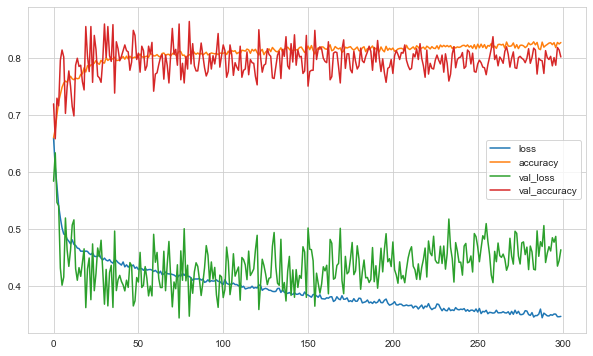

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [72]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 747us/step
[[597 199]
 [ 61 143]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       796
           1       0.42      0.70      0.52       204

    accuracy                           0.74      1000
   macro avg       0.66      0.73      0.67      1000
weighted avg       0.81      0.74      0.76      1000



## GridSearchCV

In [73]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [74]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [75]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [76]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
64/64 [==============================] - 1s 3ms/step - loss: 0.4925 - accuracy: 0.7905 - val_loss: 0.4439 - val_accuracy: 0.8000
Epoch 2/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8036 - val_loss: 0.4208 - val_accuracy: 0.8322
Epoch 3/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8130 - val_loss: 0.3901 - val_accuracy: 0.8478
Epoch 4/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8319 - val_loss: 0.3450 - val_accuracy: 0.8600
Epoch 5/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8379 - val_loss: 0.3398 - val_accuracy: 0.8622
Epoch 6/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8485 - val_loss: 0.3161 - val_accuracy: 0.8733
Epoch 7/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000022593834C10>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [77]:
grid_model.best_score_

0.859

In [78]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [79]:
grid_model.cv_results_

{'mean_fit_time': array([19.02095385, 17.99700265, 41.18675628, 18.20645909, 11.02289834,
        12.27523708, 44.83356595, 13.41402354, 13.04904165, 12.91924286,
        43.92250128, 12.21955523, 16.93383522, 15.58626184, 27.23736496,
        16.0689095 , 10.01798711,  9.02356429, 27.11473732, 11.38198028,
         7.56197934,  9.07936225, 20.33957658,  8.86656599]),
 'std_fit_time': array([5.00174238, 2.98808505, 0.55964773, 3.83805288, 1.06448744,
        1.92848887, 0.64186001, 1.52209899, 1.39168789, 2.27720853,
        0.46648678, 1.42106927, 2.28767697, 0.71763364, 0.33877936,
        3.76727534, 1.47918545, 1.17855245, 0.50129053, 2.36325607,
        0.48955416, 1.37619289, 0.52428244, 0.52640185]),
 'mean_score_time': array([0.60843844, 1.80296817, 0.48660665, 0.56939044, 0.89502263,
        0.45761871, 0.44804063, 0.51495299, 0.4949357 , 2.01891007,
        0.43813276, 0.48626599, 0.46446114, 0.44579268, 0.36369076,
        2.50037675, 0.75080652, 0.55352063, 0.40194354, 2.09

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [80]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 715us/step
[[763  33]
 [110  94]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



32/32 [==============================] - 0s 628us/step


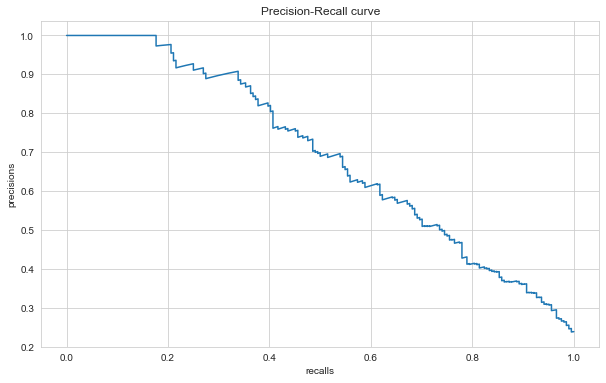

In [81]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [82]:
average_precision_score(y_test, y_pred_proba)

0.6933786937970253

# Final Model and Model Deployment

In [83]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [84]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

AttributeError: 'NoneType' object has no attribute 'history'

In [87]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 713us/step
[[792   4]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       796
           1       0.00      0.00      0.00       204

    accuracy                           0.79      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.79      0.70      1000



In [88]:
model.save('model_churn.h5')

## Prediction

In [89]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 0, dtype: float64

In [90]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [91]:
model.predict(single_customer)

1/1 [==============================] - 0s 25ms/step


array([[0.4458374]], dtype=float32)

In [92]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___